In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score , mean_squared_error , r2_score , confusion_matrix , classification_report

##Data Exploration , Preprocessing , and Visualization

In [ ]:
df = pd.read_csv("/content/Copy of adult.csv")
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [ ]:
for column in df.columns:
    print(column ,":",df[column].nunique() ,"\n", "unique values",df[column].unique())

age : 74 
 unique values [25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
workclass : 9 
 unique values ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
fnlwgt : 28523 
 unique values [226802  89814 336951 ... 129912 255835 257302]
education : 16 
 unique values ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
educational-num : 16 
 unique values [ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]
marital-status : 7 
 unique values ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation : 15 
 unique values ['Machine-op-inspct' 'Farming-fishing' 'Protecti

In [ ]:
df.replace("?",np.nan,inplace=True)

In [ ]:
df.isna().sum()

,0
age,0
workclass,2799
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,2809
relationship,0
race,0
gender,0


In [ ]:
for col in ["workclass","occupation","native-country"]:
  df[col].fillna(df[col].mode()[0],inplace=True)

In [ ]:
df.duplicated().sum()

53

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
le = LabelEncoder()
for col in df.select_dtypes(include=["object"]).columns:
  df[col] = le.fit_transform(df[col])
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,3,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,3,160323,15,10,2,6,0,2,1,7688,0,40,38,1
4,18,3,103497,15,10,4,9,3,4,0,0,0,30,38,0


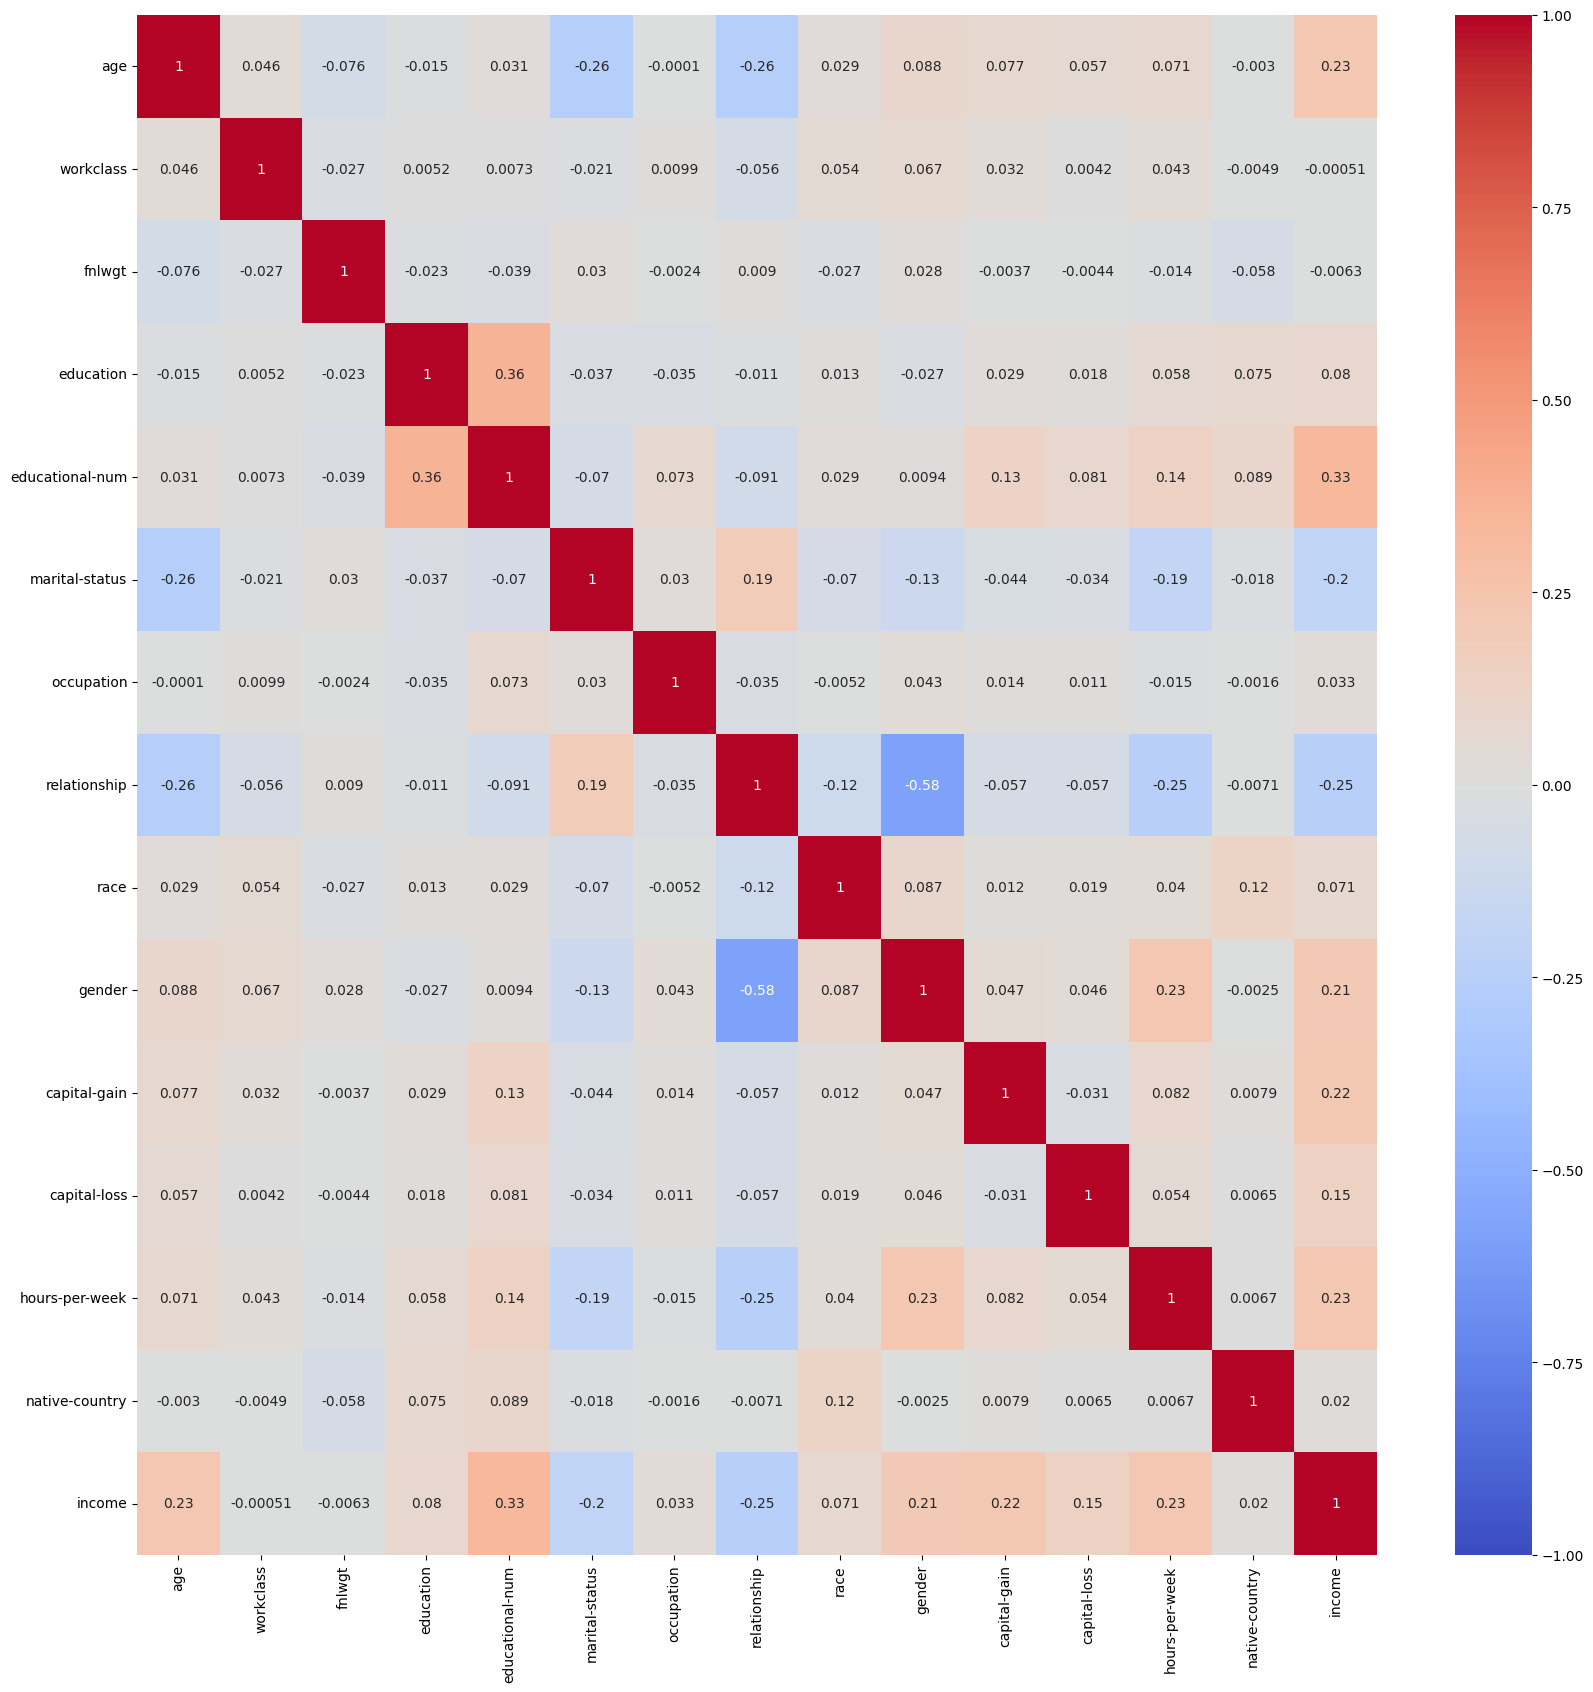

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr() , annot=True , cmap="coolwarm", vmin=-1 , vmax=1 , center=0)
plt.show()

In [ ]:
for col in df.columns:
  print(col ,"min", df[col].min() ,"max", df[col].max())
  print(df[col].value_counts())

age min 17 max 90
age
36    1348
35    1336
33    1335
23    1325
31    1324
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64
workclass min 0 max 7
workclass
3    36654
5     3861
1     3136
6     1981
4     1694
0     1432
7       21
2       10
Name: count, dtype: int64
fnlwgt min 12285 max 1490400
fnlwgt
203488    21
120277    19
190290    19
125892    18
126569    18
          ..
160467     1
114648     1
301229     1
155382     1
268083     1
Name: count, Length: 28523, dtype: int64
education min 0 max 15
education
11    15770
15    10862
9      8013
12     2656
8      2060
1      1812
7      1601
0      1389
5       954
14      834
6       756
2       655
10      594
4       507
3       245
13       81
Name: count, dtype: int64
educational-num min 1 max 16
educational-num
9     15770
10    10862
13     8013
14     2656
11     2060
7      1812
12     1601
6      1389
4       954
15      834
5       756
8       655
16      594
3

In [ ]:
df["capital-gain"]=np.log1p(df["capital-gain"])
df["capital-loss"]=np.log1p(df["capital-loss"])
df["native-country"]=np.log1p(df["native-country"])
scaler = StandardScaler()
df["fnlwgt"] = scaler.fit_transform(df[["fnlwgt"]])

In [ ]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,0.351575,1,7,4,6,3,2,1,0.000000,0.0,40,3.663562,0
1,38,3,-0.945449,11,9,2,4,0,4,1,0.000000,0.0,50,3.663562,0
2,28,1,1.394483,7,12,2,10,0,4,1,0.000000,0.0,40,3.663562,1
3,44,3,-0.277859,15,10,2,6,0,2,1,8.947546,0.0,40,3.663562,1
4,18,3,-0.815897,15,10,4,9,3,4,0,0.000000,0.0,30,3.663562,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,0.640354,7,12,2,12,5,4,0,0.000000,0.0,38,3.663562,0
48838,40,3,-0.334185,11,9,2,6,0,4,1,0.000000,0.0,40,3.663562,1
48839,58,3,-0.357515,11,9,6,0,4,4,0,0.000000,0.0,40,3.663562,0
48840,22,3,0.111917,11,9,4,0,3,4,1,0.000000,0.0,20,3.663562,0


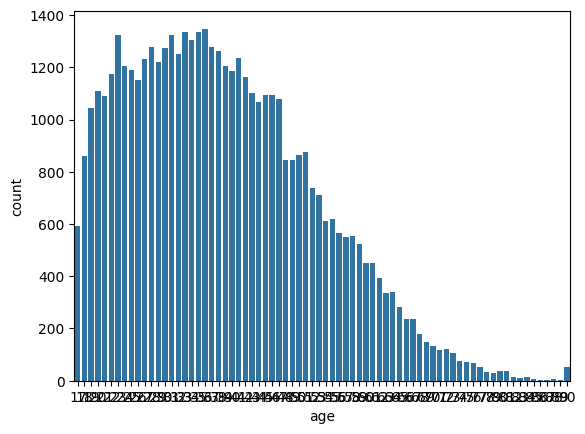

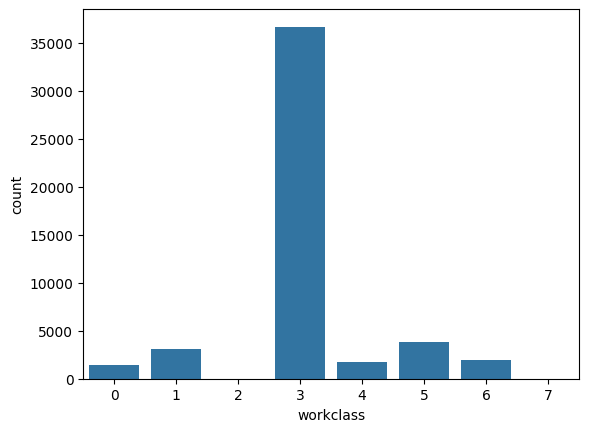

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7d06f2682b00> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7d06f2681d80> (for post_execute):


KeyboardInterrupt: 

In [ ]:
for col in df.columns:
  sns.countplot(x=df[col])
  plt.show()

##Data Splitting

In [ ]:
y = df["income"]
x = df.drop("income",axis=1)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

##Models Building

##1-Linear Regression

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)
y_pred_lr = linear_reg.predict(x_test)

In [ ]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr}")
print(f"Linear Regression R2 Score: {r2_score(y_test, y_pred_lr)}")

Linear Regression MSE: 0.13305719742730485
Linear Regression R2 Score: 0.28215115467075935


##2-Logistic Regression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred_log = log_reg.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_log)}")

Logistic Regression Accuracy: 0.8022135683541709
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      7360
           1       0.65      0.42      0.51      2398

    accuracy                           0.80      9758
   macro avg       0.74      0.67      0.69      9758
weighted avg       0.79      0.80      0.79      9758



##Logistic Regression with GridSearchCV

In [ ]:
param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}
grid_search_log_reg = GridSearchCV(LogisticRegression(max_iter=200), param_grid_log_reg, cv=5, scoring='accuracy',n_jobs=-1, verbose=1)
grid_search_log_reg.fit(x_train, y_train)
best_log_reg = grid_search_log_reg.best_estimator_
y_pred_best_log_reg = best_log_reg.predict(x_test)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [ ]:
print(f"Best Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_best_log_reg)}")
print(f"Best Logistic Regression Classification Report:\n{classification_report(y_test, y_pred_best_log_reg)}")

Best Logistic Regression Accuracy: 0.8133838901414224
Best Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.88      7360
           1       0.69      0.44      0.53      2398

    accuracy                           0.81      9758
   macro avg       0.76      0.69      0.71      9758
weighted avg       0.80      0.81      0.80      9758



##3-K-Nearest Neighbors (KNN)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

In [ ]:
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_knn)}")

KNN Accuracy: 0.8078499692559951
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      7360
           1       0.62      0.58      0.60      2398

    accuracy                           0.81      9758
   macro avg       0.74      0.73      0.73      9758
weighted avg       0.80      0.81      0.81      9758



##KNN with GridSearchCV

In [ ]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3,n_jobs=-1, scoring='accuracy', verbose=1)
grid_search_knn.fit(x_train, y_train)
best_knn = grid_search_knn.best_estimator_
y_pred_best_knn = best_knn.predict(x_test)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [ ]:
print(f"Best KNN Accuracy: {accuracy_score(y_test, y_pred_best_knn)}")
print(f"Best KNN Classification Report:\n{classification_report(y_test, y_pred_best_knn)}")

Best KNN Accuracy: 0.8242467718794835
Best KNN Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      7360
           1       0.66      0.59      0.62      2398

    accuracy                           0.82      9758
   macro avg       0.76      0.75      0.75      9758
weighted avg       0.82      0.82      0.82      9758



##4-Support Vector Machine (SVM)

In [ ]:
svm = SVC()
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)

In [ ]:

print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_svm)}")

SVM Accuracy: 0.8167657306825169
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      7360
           1       0.74      0.39      0.51      2398

    accuracy                           0.82      9758
   macro avg       0.78      0.67      0.70      9758
weighted avg       0.81      0.82      0.80      9758



##5-Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred_tree = decision_tree.predict(x_test)

In [ ]:
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_tree)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_tree)}")

Decision Tree Accuracy: 0.8152285304365648
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7360
           1       0.63      0.62      0.62      2398

    accuracy                           0.82      9758
   macro avg       0.75      0.75      0.75      9758
weighted avg       0.81      0.82      0.81      9758



##Decision Tree with GridSearchCV

In [ ]:
param_grid_tree = {
    'criterion': ['gini'],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}
grid_search_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_tree, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_tree.fit(x_train, y_train)
best_tree = grid_search_tree.best_estimator_
y_pred_best_tree = best_tree.predict(x_test)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


In [ ]:
print(f"Best Decision Tree Accuracy: {accuracy_score(y_test, y_pred_best_tree)}")
print(f"Best Decision Tree Classification Report:\n{classification_report(y_test, y_pred_best_tree)}")

Best Decision Tree Accuracy: 0.8521213363394138
Best Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      7360
           1       0.73      0.64      0.68      2398

    accuracy                           0.85      9758
   macro avg       0.81      0.78      0.79      9758
weighted avg       0.85      0.85      0.85      9758



##6-Random Forest

In [ ]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
y_pred_rf = random_forest.predict(x_test)

In [ ]:
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")

Random Forest Accuracy: 0.8565279770444764
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7360
           1       0.75      0.62      0.68      2398

    accuracy                           0.86      9758
   macro avg       0.82      0.78      0.79      9758
weighted avg       0.85      0.86      0.85      9758



##Random Forest with GridSearchCV

In [ ]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
y_pred_rf = random_forest.predict(x_test)

In [ ]:
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")

Random Forest Accuracy: 0.8571428571428571
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7360
           1       0.76      0.62      0.68      2398

    accuracy                           0.86      9758
   macro avg       0.82      0.78      0.79      9758
weighted avg       0.85      0.86      0.85      9758



##Random Forest with GridSearchCV

In [ ]:
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_rf.fit(x_train, y_train)
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(x_test)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [ ]:
print(f"Best Random Forest Accuracy: {accuracy_score(y_test, y_pred_best_rf)}")
print(f"Best Random Forest Classification Report:\n{classification_report(y_test, y_pred_best_rf)}")

Best Random Forest Accuracy: 0.8615494978479197
Best Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7360
           1       0.78      0.61      0.68      2398

    accuracy                           0.86      9758
   macro avg       0.83      0.78      0.80      9758
weighted avg       0.86      0.86      0.86      9758



##Bagging

In [ ]:
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging.fit(x_train, y_train)
y_pred_bagging = bagging.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
print(f"Bagging Accuracy: {accuracy_score(y_test, y_pred_bagging)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_bagging)}")

Bagging Accuracy: 0.8505841360934617
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.90      7360
           1       0.75      0.59      0.66      2398

    accuracy                           0.85      9758
   macro avg       0.81      0.76      0.78      9758
weighted avg       0.84      0.85      0.84      9758



##Bagging with GridSearchCV

In [ ]:
param_grid_bagging = {
    'n_estimators': [10, 20],
    'max_samples': [0.5, 0.7]
}
grid_search_bagging = GridSearchCV(BaggingClassifier(base_estimator=DecisionTreeClassifier()), param_grid_bagging, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_bagging.fit(x_train, y_train)
best_bagging = grid_search_bagging.best_estimator_
y_pred_best_bagging = best_bagging.predict(x_test)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
print(f"Best Bagging Accuracy: {accuracy_score(y_test, y_pred_best_bagging)}")
print(f"Best Bagging Classification Report:\n{classification_report(y_test, y_pred_best_bagging)}")

Best Bagging Accuracy: 0.8546833367493338
Best Bagging Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7360
           1       0.76      0.60      0.67      2398

    accuracy                           0.85      9758
   macro avg       0.82      0.77      0.79      9758
weighted avg       0.85      0.85      0.85      9758



##AdaBoost (Boosting)

In [ ]:
boosting = AdaBoostClassifier(n_estimators=50, random_state=42)
boosting.fit(x_train, y_train)
y_pred_boost = boosting.predict(x_test)

In [ ]:
print(f"Boosting (AdaBoost) Accuracy: {accuracy_score(y_test, y_pred_boost)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_boost)}")

Boosting (AdaBoost) Accuracy: 0.8544783767165403
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      7360
           1       0.77      0.58      0.66      2398

    accuracy                           0.85      9758
   macro avg       0.82      0.76      0.79      9758
weighted avg       0.85      0.85      0.85      9758



##Boosting (AdaBoost) with GridSearchCV

In [ ]:
param_grid_boost = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1]
}
grid_search_boost = GridSearchCV(AdaBoostClassifier(), param_grid_boost, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_boost.fit(x_train, y_train)
best_boost = grid_search_boost.best_estimator_
y_pred_best_boost = best_boost.predict(x_test)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


In [ ]:
print(f"Best Boosting (AdaBoost) Accuracy: {accuracy_score(y_test, y_pred_best_boost)}")
print(f"Best Boosting (AdaBoost) Classification Report:\n{classification_report(y_test, y_pred_best_boost)}")

Best Boosting (AdaBoost) Accuracy: 0.8441278950604633
Best Boosting (AdaBoost) Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      7360
           1       0.79      0.50      0.61      2398

    accuracy                           0.84      9758
   macro avg       0.82      0.73      0.76      9758
weighted avg       0.84      0.84      0.83      9758



##XGBoost

In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:31:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_xgb)}")

XGBoost Accuracy: 0.8682106989137118
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      7360
           1       0.79      0.64      0.70      2398

    accuracy                           0.87      9758
   macro avg       0.84      0.79      0.81      9758
weighted avg       0.86      0.87      0.86      9758



In [ ]:
param_grid_xgb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1],
    'max_depth': [3, 5]
}
grid_search_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), param_grid_xgb, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_xgb.fit(x_train, y_train)
best_xgb = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb.predict(x_test)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:33:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
print(f"Best XGBoost Accuracy: {accuracy_score(y_test, y_pred_best_xgb)}")
print(f"Best XGBoost Classification Report:\n{classification_report(y_test, y_pred_best_xgb)}")

Best XGBoost Accuracy: 0.8672883787661406
Best XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.91      7360
           1       0.79      0.63      0.70      2398

    accuracy                           0.87      9758
   macro avg       0.84      0.79      0.81      9758
weighted avg       0.86      0.87      0.86      9758

